In [278]:
try:
    reload(mcmillan)
    reload(orbit_helper)
except NameError:
    import mcmillan
    import orbit_helper
from mcmillan import McMillan2017
import numpy as np
import matplotlib.pyplot as plt
import safe_colours
from scipy.integrate import quad
from galpy.potential import MWPotential2014, NFWPotential, DiskSCFPotential, plotDensities, plotRotcurve
from galpy.actionAngle import actionAngleStaeckel
from galpy.orbit import Orbit

safe_colours = safe_colours.initialise()

col_dict = safe_colours.distinct_named()
cm_rainbow = safe_colours.colourmap('rainbow')
cm_heat = safe_colours.colourmap('heat')
cm_diverging = safe_colours.colourmap('diverging') 

params = {'axes.labelsize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'text.usetex': True, 'lines.linewidth' : 1, 'axes.titlesize' : 15, 'font.family' : 'serif'}
plt.rcParams.update(params)


columnwidth = 240./72.27
textwidth = 504.0/72.27

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Compare the McMillan2017 potential with galpy MWPotential2014
### Densities

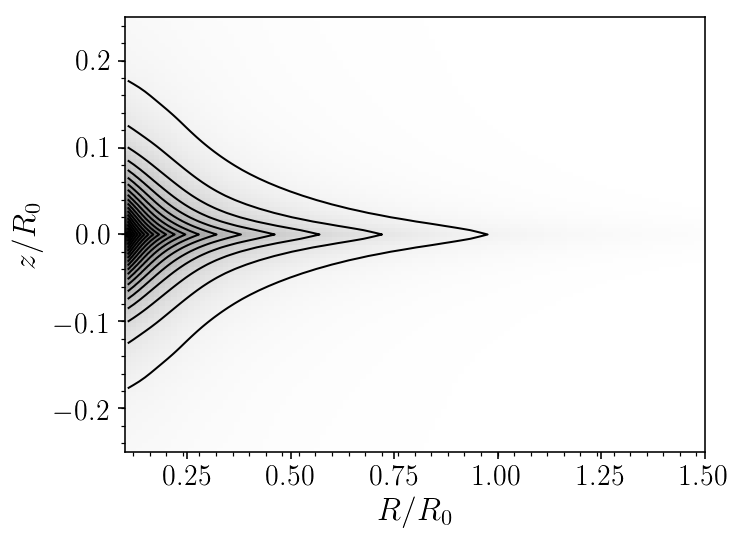

In [240]:
plotDensities(McMillan2017,rmin=0.1,zmax=0.25,zmin=-0.25,nrs=101,nzs=101)

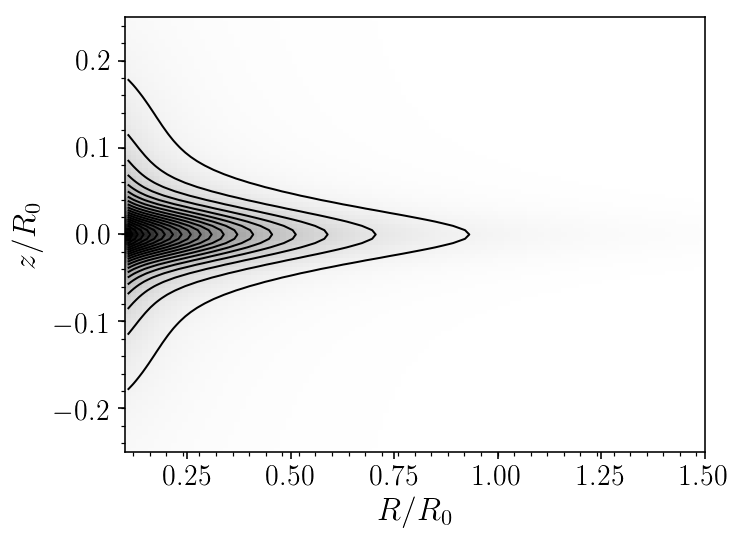

In [241]:
plotDensities(MWPotential2014,rmin=0.1,zmax=0.25,zmin=-0.25,nrs=101,nzs=101)

Doesnt look too nonsensical...

### Rotation Curves

(0.0, 1.2)

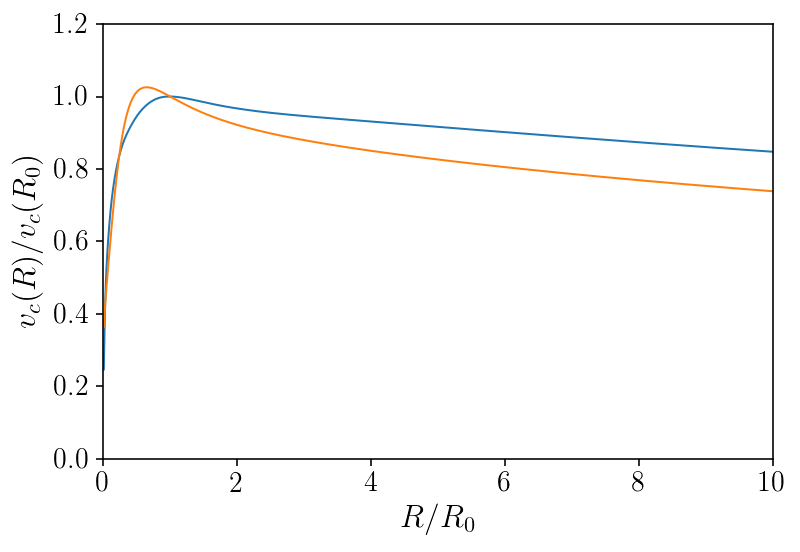

In [332]:
plotRotcurve(McMillan2017,Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2], overplot=True)
plotRotcurve(MWPotential2014,Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2], overplot=True)
plt.xlabel(r'$R/R_0$')
plt.ylabel(r'$v_c(R)/v_c(R_0)$')
plt.xlim(0.,10.)
plt.ylim(0.,1.2)

Rotation curves are quite different though...

## Look at some orbits

In [272]:
o_mw = orbit_helper.orbit_at_E_L(-1.5,0.)
o_mm = orbit_helper.orbit_at_E_L(-1.5,0.,pot=McMillan2017)

/home/astjmack/anaconda2/lib/python2.7/site-packages/galpy-1.3.dev0-py2.7-linux-x86_64.egg/galpy/potential_src/SCFPotential.py:225: RuntimeWarning: overflow encountered in power
  phi[:,:] = - (r*a)**l/ ((a + r)**(2*l + 1.)) * CC[:,:]* (4*nu.pi)**0.5



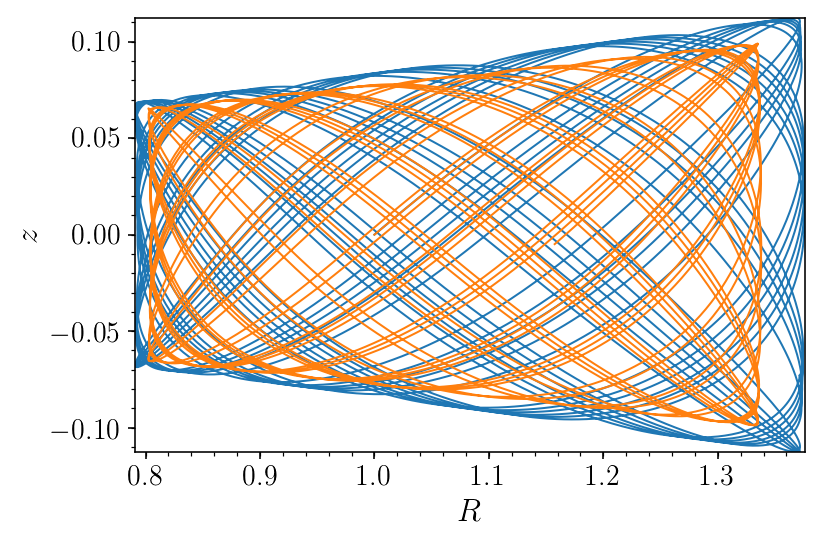

In [273]:
ts = np.linspace(0.,100.,10000)
o_mm.integrate(ts,pot=McMillan2017)
o_mm.plot()
o_mw.integrate(ts,pot=MWPotential2014)
o_mw.plot(overplot=True)

## Compare grid of parameters calculated in each (adopt constant delta, same orbits)

In [327]:
logLmin, logLmax= -0.3, 0.3
logEmin, logEmax= -2., -0.5
nL, nE= 101,101

initgrid = orbit_helper.orbits_on_grid(logE_range=[logEmin,logEmax], logL_range=[logLmin,logLmax], nE = nE, nL =nL)

aAS_mm = actionAngleStaeckel(pot=McMillan2017, delta=0.4)
aAS_mw = actionAngleStaeckel(pot=MWPotential2014, delta=0.4)

In [328]:
param_mm = aAS_mm.EccZmaxRperiRap(initgrid[:,:,0].ravel(), 
                    initgrid[:,:,1].ravel(), 
                    initgrid[:,:,2].ravel(),
                    initgrid[:,:,3].ravel(),
                    initgrid[:,:,4].ravel(),
                    initgrid[:,:,5].ravel())

param_mw = aAS_mw.EccZmaxRperiRap(initgrid[:,:,0].ravel(), 
                    initgrid[:,:,1].ravel(), 
                    initgrid[:,:,2].ravel(),
                    initgrid[:,:,3].ravel(),
                    initgrid[:,:,4].ravel(),
                    initgrid[:,:,5].ravel())

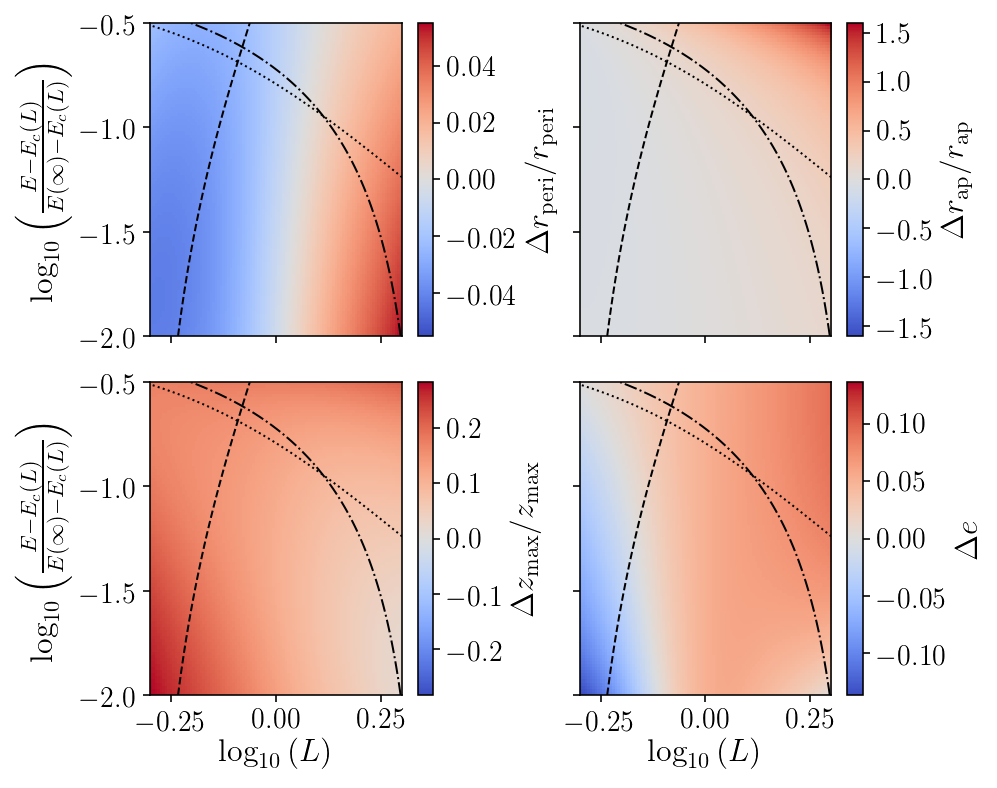

In [330]:


legrid = np.mgrid[logEmin:logEmax:101j,logLmin:logLmax:101j]

extent = [logLmin, logLmax, logEmin, logEmax]
fig, ax = plt.subplots(2,2, sharey=True, sharex=True)
fig.set_size_inches(textwidth, 0.8*textwidth)
labels = [r'$\Delta r_{\mathrm{peri}}/r_{\mathrm{peri}}$',r'$\Delta r_{\mathrm{ap}}/r_{\mathrm{ap}}$',r'$\Delta z_{\mathrm{max}}/z_{\mathrm{max}}$',r'$\Delta e$']
inds = [2,3,1,0]
for i in range(len(labels)):
    index = inds[i]
    if index < 3:
        de = (param_mw[index].reshape(nE,nL)-param_mm[index].reshape(nE,nL))/param_mw[index].reshape(nE,nL)
        
    else:
        de = param_mw[index].reshape(nE,nL)-param_mm[index].reshape(nE,nL)
        
    lim = np.nanmax(np.fabs(de))
    s = ax.ravel()[i].imshow(de[::-1], cmap=plt.cm.coolwarm, extent=extent, aspect='auto', vmin=-lim, vmax=lim)
    rpCS = ax.ravel()[i].contour(legrid[1][::-1], legrid[0][::-1],param_mw[2].reshape(nE,nL)[::-1], levels = [4./8.], colors='Black', linestyles='dashed', label=r'$R_{\mathrm{peri}} = 4\ \mathrm{kpc}$')
    raCS = ax.ravel()[i].contour(legrid[1][::-1], legrid[0][::-1],param_mw[3].reshape(nE,nL)[::-1], levels = [20./8.], colors='Black', linestyles='dashdot', label=r'$R_{\mathrm{apo}} = 20\ \mathrm{kpc}$')
    zmCS = ax.ravel()[i].contour(legrid[1][::-1], legrid[0][::-1],param_mw[1].reshape(nE,nL)[::-1], levels = [4./8.], colors='Black', linestyles='dotted', label=r'$Z_{\mathrm{max}} = 4\ \mathrm{kpc}$')
    plt.colorbar(s, label=labels[i], ax=ax.ravel()[i])

#ax[1,1].text(-0.2,-0.15,r'$r_{\mathrm{peri}} = 4\ \mathrm{kpc}$', fontsize=7,bbox={'facecolor':'White', 'alpha':0.8, 'pad':2})
#ax[1,1].text(-1.8,-0.6,r'$z_{\mathrm{max}} = 4\ \mathrm{kpc}$', fontsize=7,bbox={'facecolor':'White', 'alpha':0.8, 'pad':2})
#ax[1,1].text(-1.8,-0.15,r'$r_{\mathrm{ap}} = 20\ \mathrm{kpc}$', fontsize=7,bbox={'facecolor':'White', 'alpha':0.8, 'pad':2})
ax[1,0].set_xlabel(r'$\log_{10}{(L)}$')
ax[1,1].set_xlabel(r'$\log_{10}{(L)}$')
ax[0,0].set_ylabel(r'$\log_{10}{\left(\frac{E-E_c(L)}{E(\infty)-E_c(L)}\right)}$')
ax[1,0].set_ylabel(r'$\log_{10}{\left(\frac{E-E_c(L)}{E(\infty)-E_c(L)}\right)}$')
fig.tight_layout()

Looks like McMillan2017 always underestimates $z_\mathrm{max}$ relative to MWPotential2014 - as much as 20%

$r_\mathrm{ap}$ can be very different - $r_\mathrm{peri}$ not so bad. $e$ is generally underestimated in disk region